In [5]:
from model.model import ImageCommandConverter
from model.train_model import data_transforms
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt


check_path = 'checkpoints/lightning_logs/version_3/checkpoints/epoch=28-step=202.ckpt'
model = ImageCommandConverter.load_from_checkpoint(check_path)

In [8]:
from data_generator import DataGenerator
generator = DataGenerator()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

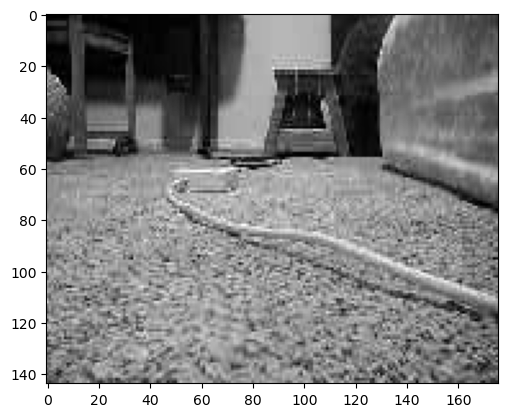

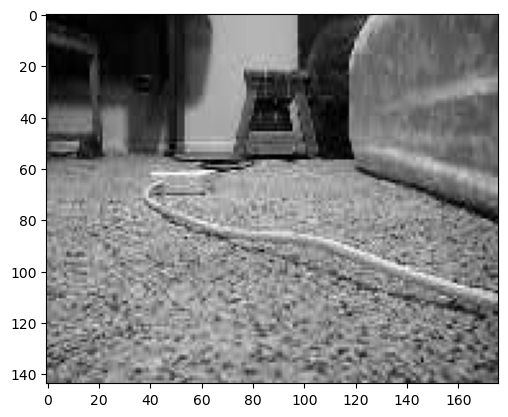

In [11]:
im1, im2, vector = generator.get_data()
vector[1] = vector[1] / 10.  # speed normalization
vector[2] = vector[2] / 4.  # rovio units value normalization
_ = plt.figure()
_ = plt.imshow(im1, cmap="gray")
_ = plt.figure()
_ = plt.imshow(im2, cmap="gray")

In [36]:
def get_pred(im1, im2, model):
    img = np.moveaxis(np.array([im1, im2, im2-im1]), 0, -1)
    img = data_transforms['validation'](img)
    v_pred = model.forward(img.unsqueeze(0))[0].tolist()
    command = np.argmax(v_pred[:10])
    speed = v_pred[10] * 10
    units = v_pred[11] * 4
    return command, speed, units

In [37]:
print(f'Predicted vector: {get_pred(im1, im2, model)}')
print(f'Reverse vector: {get_pred(im2, im1, model)}')
print(f'Actual vector: {vector[0]}, {vector[1]*10}, {vector[2]*4}')

Predicted vector: (9, 0.0027288158889859915, 0.001165891415439546)
Reverse vector: (2, 0.002223003684775904, 0.0010061045177280903)
Actual vector: 2.0, 7.0, 0.23233444867279784


In [39]:
from model.data_set import get_datasets, ImageDataSet
from torch.utils.data import DataLoader


train_set, val_set = get_datasets()
train_dataset = ImageDataSet(train_set, transform=data_transforms['validation'])
train_loader = DataLoader(train_dataset, batch_size=1,
                            shuffle=True,
                            num_workers=0)

In [41]:
it = iter(train_loader)

In [52]:
for i in range(10):
    item = next(it)
    v_train = model.forward(item[0]).tolist()[0]
    print(f'predicted: {np.argmax(v_train[:10])}, {v_train[10]}, {v_train[11]}')
    print(f'expected: {item[1]}')
    print('-'*10)

predicted: 4, 0.0003534845891408622, 0.00024170844699256122
expected: tensor([[4.0000, 0.7000, 0.0481]], dtype=torch.float64)
----------
predicted: 2, 0.0004747796047013253, 0.0003772985946852714
expected: tensor([[6.0000, 0.4000, 0.9977]], dtype=torch.float64)
----------
predicted: 6, 0.00035768430097959936, 0.0002728826366364956
expected: tensor([[7.0000, 0.6000, 0.4118]], dtype=torch.float64)
----------
predicted: 6, 0.0003500476013869047, 0.00035674168611876667
expected: tensor([[6.0000, 0.6000, 0.3275]], dtype=torch.float64)
----------
predicted: 6, 0.000271879427600652, 0.000247812713496387
expected: tensor([[6.0000, 0.3000, 0.2477]], dtype=torch.float64)
----------
predicted: 9, 0.00030414696084335446, 0.0002794644678942859
expected: tensor([[7.0000, 1.0000, 0.3967]], dtype=torch.float64)
----------
predicted: 5, 0.0004173941269982606, 0.0003379180561751127
expected: tensor([[3.0000, 0.1000, 0.5298]], dtype=torch.float64)
----------
predicted: 1, 0.00039431522600352764, 0.000316